In [387]:
import keras
from keras.models import *
from keras import *
from tensorflow import *
from keras.layers import *
from tensorflow.keras import *
from mlxtend.plotting import plot_decision_regions
from keras.constraints import maxnorm
from keras.layers import Dropout
data = scipy.io.loadmat('data.mat')
#creating the validation set from the training set
zz = data['X']
train_x = zz[:150]
val_x=zz[150:]
yy = data['y']
train_y = yy[:150]
val_y = yy[150:]
test_x = data['Xval']
test_y = data['yval']

In [395]:
class NN:
    def __init__(self,n1,n2,n3,train_x,train_y,val_x,val_y,test_x,test_y,data):#passing the number of neurons for the first,second and last layer
        self.n1 =n1#initilizing the parameters
        self.n2 =n2
        self.n3 =n3
        self.train_x=train_x
        self.train_y=train_y
        self.val_x=val_x
        self.val_y=val_y
        self.test_x=test_x
        self.test_y=test_y
        self.data=data
    def initialmodel(self):
        model = Sequential()#making our initial model with no drop and regulization 
        model.add(Dense(self.n1, input_dim=2, activation='relu'))
        model.add(Dense(self.n2, activation='relu'))
        model.add(Dense(self.n3, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
        history_init = model.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=32,epochs=250,verbose = 2)
        _, accuracy = model.evaluate(self.test_x,self.test_y)
        print('Accuracy: %.2f' % (accuracy*100))
        return (model,accuracy)
    def l2model(self):
        rmodel = Sequential()#adding l2 regulization
        rmodel.add(Dense(self.n1, input_dim=2, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
        rmodel.add(Dense(self.n2, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
        rmodel.add(Dense(self.n3, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
        rmodel.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
        history_init = rmodel.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=32,epochs=250, verbose = 2)
        _, accuracy = rmodel.evaluate(self.test_x,self.test_y)
        print('Accuracy: %.2f' % (accuracy*100))    
        return (rmodel,accuracy)
    def dropmodel(self):
        rmodel = Sequential()#adding drop out 
        rmodel.add(Dense(self.n1, input_dim=2, activation='relu'))
        rmodel.add(Dropout(0.2))
        rmodel.add(Dense(self.n2, activation='relu'))
        rmodel.add(Dropout(0.2))
        rmodel.add(Dense(self.n3, activation='sigmoid'))
        rmodel.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
        history_init = rmodel.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=32,epochs=250, verbose = 2)
        _, accuracy = rmodel.evaluate(self.test_x,self.test_y)
        print('Accuracy: %.2f' % (accuracy*100))
        return (rmodel,accuracy)
    def combo(self):
        rmodel = Sequential()#adding both dropout and l2
        rmodel.add(Dense(self.n1, input_dim=2, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
        rmodel.add(Dropout(0.2))
        rmodel.add(Dense(self.n2, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
        rmodel.add(Dropout(0.2))
        rmodel.add(Dense(self.n3, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
        rmodel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
        history_init = rmodel.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=32,epochs=250, verbose = 2)
        _, accuracy = rmodel.evaluate(self.test_x,self.test_y)
        print('Accuracy: %.2f' % (accuracy*100))  
        return (rmodel,accuracy)
    def plot(self,b,zz):
        X=(self.data)['Xval']
        Y=(self.data)['yval']
        plot_decision_regions(X,Y.ravel(), clf = b[0], legend = 2)#plotting out decision boundaries
        plt.title(zz)
        plt.xlabel(b[1])
        plt.show()

Making Object class

In [402]:
m = NN(16,8,1,train_x,train_y,val_x,val_y,test_x,test_y,data)

# Making initial model(Accuracy=  87.5  )

In [403]:
a=m.initialmodel()
print(a)

Epoch 1/250
5/5 - 1s - loss: 0.7251 - accuracy: 0.4133 - val_loss: 0.6959 - val_accuracy: 0.6885
Epoch 2/250
5/5 - 0s - loss: 0.7161 - accuracy: 0.4133 - val_loss: 0.6956 - val_accuracy: 0.6721
Epoch 3/250
5/5 - 0s - loss: 0.7077 - accuracy: 0.4133 - val_loss: 0.6955 - val_accuracy: 0.6393
Epoch 4/250
5/5 - 0s - loss: 0.7010 - accuracy: 0.4200 - val_loss: 0.6951 - val_accuracy: 0.6393
Epoch 5/250
5/5 - 0s - loss: 0.6951 - accuracy: 0.4533 - val_loss: 0.6947 - val_accuracy: 0.6066
Epoch 6/250
5/5 - 0s - loss: 0.6904 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5902
Epoch 7/250
5/5 - 0s - loss: 0.6863 - accuracy: 0.5867 - val_loss: 0.6932 - val_accuracy: 0.6066
Epoch 8/250
5/5 - 0s - loss: 0.6825 - accuracy: 0.6533 - val_loss: 0.6920 - val_accuracy: 0.5902
Epoch 9/250
5/5 - 0s - loss: 0.6787 - accuracy: 0.7067 - val_loss: 0.6904 - val_accuracy: 0.5738
Epoch 10/250
5/5 - 0s - loss: 0.6751 - accuracy: 0.7467 - val_loss: 0.6888 - val_accuracy: 0.5574
Epoch 11/250
5/5 - 0s - loss:

Epoch 85/250
5/5 - 0s - loss: 0.1904 - accuracy: 0.9267 - val_loss: 0.5950 - val_accuracy: 0.6885
Epoch 86/250
5/5 - 0s - loss: 0.1893 - accuracy: 0.9267 - val_loss: 0.5994 - val_accuracy: 0.6721
Epoch 87/250
5/5 - 0s - loss: 0.1883 - accuracy: 0.9267 - val_loss: 0.5988 - val_accuracy: 0.6721
Epoch 88/250
5/5 - 0s - loss: 0.1876 - accuracy: 0.9267 - val_loss: 0.5934 - val_accuracy: 0.6885
Epoch 89/250
5/5 - 0s - loss: 0.1866 - accuracy: 0.9267 - val_loss: 0.5946 - val_accuracy: 0.6885
Epoch 90/250
5/5 - 0s - loss: 0.1858 - accuracy: 0.9267 - val_loss: 0.5979 - val_accuracy: 0.6885
Epoch 91/250
5/5 - 0s - loss: 0.1848 - accuracy: 0.9267 - val_loss: 0.6009 - val_accuracy: 0.6885
Epoch 92/250
5/5 - 0s - loss: 0.1843 - accuracy: 0.9333 - val_loss: 0.5999 - val_accuracy: 0.6885
Epoch 93/250
5/5 - 0s - loss: 0.1834 - accuracy: 0.9333 - val_loss: 0.5972 - val_accuracy: 0.6885
Epoch 94/250
5/5 - 0s - loss: 0.1828 - accuracy: 0.9267 - val_loss: 0.5927 - val_accuracy: 0.6885
Epoch 95/250
5/5 - 0

Epoch 168/250
5/5 - 0s - loss: 0.1690 - accuracy: 0.9333 - val_loss: 0.5773 - val_accuracy: 0.6885
Epoch 169/250
5/5 - 0s - loss: 0.1695 - accuracy: 0.9333 - val_loss: 0.5847 - val_accuracy: 0.6885
Epoch 170/250
5/5 - 0s - loss: 0.1689 - accuracy: 0.9333 - val_loss: 0.5862 - val_accuracy: 0.6885
Epoch 171/250
5/5 - 0s - loss: 0.1688 - accuracy: 0.9333 - val_loss: 0.5826 - val_accuracy: 0.6885
Epoch 172/250
5/5 - 0s - loss: 0.1689 - accuracy: 0.9333 - val_loss: 0.5852 - val_accuracy: 0.6885
Epoch 173/250
5/5 - 0s - loss: 0.1688 - accuracy: 0.9333 - val_loss: 0.5813 - val_accuracy: 0.6885
Epoch 174/250
5/5 - 0s - loss: 0.1688 - accuracy: 0.9333 - val_loss: 0.5808 - val_accuracy: 0.6885
Epoch 175/250
5/5 - 0s - loss: 0.1690 - accuracy: 0.9333 - val_loss: 0.5872 - val_accuracy: 0.6721
Epoch 176/250
5/5 - 0s - loss: 0.1687 - accuracy: 0.9333 - val_loss: 0.5847 - val_accuracy: 0.6885
Epoch 177/250
5/5 - 0s - loss: 0.1689 - accuracy: 0.9333 - val_loss: 0.5901 - val_accuracy: 0.6721
Epoch 178/

7/7 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8750
Accuracy: 87.50
(<tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B89CA4C198>,
 0.875)


# Making L2 Regulization(Accuracy=  86.5  )

In [404]:
b = m.l2model()
print(b)

Epoch 1/250
5/5 - 1s - loss: 0.6749 - accuracy: 0.7467 - val_loss: 0.6931 - val_accuracy: 0.4754
Epoch 2/250
5/5 - 0s - loss: 0.6675 - accuracy: 0.8400 - val_loss: 0.6929 - val_accuracy: 0.4590
Epoch 3/250
5/5 - 0s - loss: 0.6595 - accuracy: 0.8667 - val_loss: 0.6928 - val_accuracy: 0.4426
Epoch 4/250
5/5 - 0s - loss: 0.6519 - accuracy: 0.8600 - val_loss: 0.6931 - val_accuracy: 0.4426
Epoch 5/250
5/5 - 0s - loss: 0.6435 - accuracy: 0.8667 - val_loss: 0.6925 - val_accuracy: 0.4426
Epoch 6/250
5/5 - 0s - loss: 0.6355 - accuracy: 0.8667 - val_loss: 0.6925 - val_accuracy: 0.4426
Epoch 7/250
5/5 - 0s - loss: 0.6270 - accuracy: 0.8667 - val_loss: 0.6919 - val_accuracy: 0.4426
Epoch 8/250
5/5 - 0s - loss: 0.6185 - accuracy: 0.8667 - val_loss: 0.6909 - val_accuracy: 0.4426
Epoch 9/250
5/5 - 0s - loss: 0.6094 - accuracy: 0.8733 - val_loss: 0.6898 - val_accuracy: 0.4754
Epoch 10/250
5/5 - 0s - loss: 0.6003 - accuracy: 0.8800 - val_loss: 0.6876 - val_accuracy: 0.5082
Epoch 11/250
5/5 - 0s - loss:

Epoch 85/250
5/5 - 0s - loss: 0.1743 - accuracy: 0.9333 - val_loss: 0.6144 - val_accuracy: 0.6721
Epoch 86/250
5/5 - 0s - loss: 0.1738 - accuracy: 0.9333 - val_loss: 0.6144 - val_accuracy: 0.6721
Epoch 87/250
5/5 - 0s - loss: 0.1737 - accuracy: 0.9333 - val_loss: 0.6152 - val_accuracy: 0.6721
Epoch 88/250
5/5 - 0s - loss: 0.1735 - accuracy: 0.9333 - val_loss: 0.6198 - val_accuracy: 0.6721
Epoch 89/250
5/5 - 0s - loss: 0.1732 - accuracy: 0.9333 - val_loss: 0.6185 - val_accuracy: 0.6721
Epoch 90/250
5/5 - 0s - loss: 0.1729 - accuracy: 0.9333 - val_loss: 0.6150 - val_accuracy: 0.6721
Epoch 91/250
5/5 - 0s - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.6161 - val_accuracy: 0.6721
Epoch 92/250
5/5 - 0s - loss: 0.1725 - accuracy: 0.9333 - val_loss: 0.6108 - val_accuracy: 0.6885
Epoch 93/250
5/5 - 0s - loss: 0.1723 - accuracy: 0.9333 - val_loss: 0.6078 - val_accuracy: 0.6885
Epoch 94/250
5/5 - 0s - loss: 0.1721 - accuracy: 0.9333 - val_loss: 0.6059 - val_accuracy: 0.6885
Epoch 95/250
5/5 - 0

Epoch 168/250
5/5 - 0s - loss: 0.1665 - accuracy: 0.9333 - val_loss: 0.5917 - val_accuracy: 0.6885
Epoch 169/250
5/5 - 0s - loss: 0.1668 - accuracy: 0.9400 - val_loss: 0.5929 - val_accuracy: 0.6885
Epoch 170/250
5/5 - 0s - loss: 0.1671 - accuracy: 0.9400 - val_loss: 0.5846 - val_accuracy: 0.7049
Epoch 171/250
5/5 - 0s - loss: 0.1668 - accuracy: 0.9400 - val_loss: 0.5900 - val_accuracy: 0.6885
Epoch 172/250
5/5 - 0s - loss: 0.1664 - accuracy: 0.9400 - val_loss: 0.5898 - val_accuracy: 0.6885
Epoch 173/250
5/5 - 0s - loss: 0.1664 - accuracy: 0.9400 - val_loss: 0.5913 - val_accuracy: 0.6885
Epoch 174/250
5/5 - 0s - loss: 0.1664 - accuracy: 0.9400 - val_loss: 0.5935 - val_accuracy: 0.6885
Epoch 175/250
5/5 - 0s - loss: 0.1666 - accuracy: 0.9400 - val_loss: 0.6006 - val_accuracy: 0.6885
Epoch 176/250
5/5 - 0s - loss: 0.1663 - accuracy: 0.9333 - val_loss: 0.5988 - val_accuracy: 0.6885
Epoch 177/250
5/5 - 0s - loss: 0.1663 - accuracy: 0.9400 - val_loss: 0.5958 - val_accuracy: 0.6885
Epoch 178/

7/7 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8650
Accuracy: 86.50
(<tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B89880C7B8>,
 0.8650000095367432)


# Making Dropout Regulization(Accuracy=  86  )


In [405]:
c = m.dropmodel()
print(c)

Epoch 1/250
5/5 - 1s - loss: 0.7010 - accuracy: 0.3800 - val_loss: 0.6980 - val_accuracy: 0.4262
Epoch 2/250
5/5 - 0s - loss: 0.6963 - accuracy: 0.4067 - val_loss: 0.6984 - val_accuracy: 0.2787
Epoch 3/250
5/5 - 0s - loss: 0.6919 - accuracy: 0.4933 - val_loss: 0.6985 - val_accuracy: 0.2951
Epoch 4/250
5/5 - 0s - loss: 0.6852 - accuracy: 0.5733 - val_loss: 0.6990 - val_accuracy: 0.2951
Epoch 5/250
5/5 - 0s - loss: 0.6812 - accuracy: 0.5533 - val_loss: 0.6998 - val_accuracy: 0.2951
Epoch 6/250
5/5 - 0s - loss: 0.6767 - accuracy: 0.5933 - val_loss: 0.7008 - val_accuracy: 0.2951
Epoch 7/250
5/5 - 0s - loss: 0.6732 - accuracy: 0.6333 - val_loss: 0.7019 - val_accuracy: 0.2951
Epoch 8/250
5/5 - 0s - loss: 0.6670 - accuracy: 0.6267 - val_loss: 0.7030 - val_accuracy: 0.2951
Epoch 9/250
5/5 - 0s - loss: 0.6690 - accuracy: 0.6133 - val_loss: 0.7039 - val_accuracy: 0.2951
Epoch 10/250
5/5 - 0s - loss: 0.6635 - accuracy: 0.6400 - val_loss: 0.7045 - val_accuracy: 0.2951
Epoch 11/250
5/5 - 0s - loss:

Epoch 85/250
5/5 - 0s - loss: 0.2455 - accuracy: 0.9200 - val_loss: 0.6571 - val_accuracy: 0.6557
Epoch 86/250
5/5 - 0s - loss: 0.2111 - accuracy: 0.9067 - val_loss: 0.6539 - val_accuracy: 0.6721
Epoch 87/250
5/5 - 0s - loss: 0.2434 - accuracy: 0.8933 - val_loss: 0.6516 - val_accuracy: 0.6721
Epoch 88/250
5/5 - 0s - loss: 0.2205 - accuracy: 0.9267 - val_loss: 0.6469 - val_accuracy: 0.6721
Epoch 89/250
5/5 - 0s - loss: 0.2705 - accuracy: 0.9067 - val_loss: 0.6470 - val_accuracy: 0.6721
Epoch 90/250
5/5 - 0s - loss: 0.2241 - accuracy: 0.9133 - val_loss: 0.6495 - val_accuracy: 0.6721
Epoch 91/250
5/5 - 0s - loss: 0.2262 - accuracy: 0.9067 - val_loss: 0.6504 - val_accuracy: 0.6721
Epoch 92/250
5/5 - 0s - loss: 0.2494 - accuracy: 0.9000 - val_loss: 0.6521 - val_accuracy: 0.6721
Epoch 93/250
5/5 - 0s - loss: 0.2129 - accuracy: 0.9267 - val_loss: 0.6536 - val_accuracy: 0.6721
Epoch 94/250
5/5 - 0s - loss: 0.2542 - accuracy: 0.9000 - val_loss: 0.6569 - val_accuracy: 0.6721
Epoch 95/250
5/5 - 0

Epoch 168/250
5/5 - 0s - loss: 0.2007 - accuracy: 0.9267 - val_loss: 0.6521 - val_accuracy: 0.6885
Epoch 169/250
5/5 - 0s - loss: 0.2095 - accuracy: 0.9133 - val_loss: 0.6563 - val_accuracy: 0.6721
Epoch 170/250
5/5 - 0s - loss: 0.1930 - accuracy: 0.9400 - val_loss: 0.6598 - val_accuracy: 0.6721
Epoch 171/250
5/5 - 0s - loss: 0.2238 - accuracy: 0.9200 - val_loss: 0.6562 - val_accuracy: 0.6721
Epoch 172/250
5/5 - 0s - loss: 0.2490 - accuracy: 0.8800 - val_loss: 0.6480 - val_accuracy: 0.6885
Epoch 173/250
5/5 - 0s - loss: 0.2391 - accuracy: 0.9200 - val_loss: 0.6376 - val_accuracy: 0.6885
Epoch 174/250
5/5 - 0s - loss: 0.2237 - accuracy: 0.9267 - val_loss: 0.6361 - val_accuracy: 0.6885
Epoch 175/250
5/5 - 0s - loss: 0.2053 - accuracy: 0.9200 - val_loss: 0.6347 - val_accuracy: 0.6885
Epoch 176/250
5/5 - 0s - loss: 0.1864 - accuracy: 0.9400 - val_loss: 0.6328 - val_accuracy: 0.6885
Epoch 177/250
5/5 - 0s - loss: 0.2224 - accuracy: 0.9000 - val_loss: 0.6351 - val_accuracy: 0.6885
Epoch 178/

7/7 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8600
Accuracy: 86.00
(<tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B88F2A5C18>,
 0.8600000143051147)


# Making L2 + dropout Regulization(Accuracy= 90.4  )

In [406]:
d=m.combo()
print(d)

Epoch 1/250
5/5 - 1s - loss: 0.6834 - accuracy: 0.5667 - val_loss: 0.6781 - val_accuracy: 0.5902
Epoch 2/250
5/5 - 0s - loss: 0.6731 - accuracy: 0.6667 - val_loss: 0.6760 - val_accuracy: 0.6066
Epoch 3/250
5/5 - 0s - loss: 0.6686 - accuracy: 0.7400 - val_loss: 0.6747 - val_accuracy: 0.5902
Epoch 4/250
5/5 - 0s - loss: 0.6570 - accuracy: 0.7533 - val_loss: 0.6738 - val_accuracy: 0.5902
Epoch 5/250
5/5 - 0s - loss: 0.6610 - accuracy: 0.6867 - val_loss: 0.6731 - val_accuracy: 0.5902
Epoch 6/250
5/5 - 0s - loss: 0.6524 - accuracy: 0.7267 - val_loss: 0.6735 - val_accuracy: 0.5902
Epoch 7/250
5/5 - 0s - loss: 0.6405 - accuracy: 0.7800 - val_loss: 0.6735 - val_accuracy: 0.5738
Epoch 8/250
5/5 - 0s - loss: 0.6314 - accuracy: 0.8667 - val_loss: 0.6738 - val_accuracy: 0.5574
Epoch 9/250
5/5 - 0s - loss: 0.6341 - accuracy: 0.7733 - val_loss: 0.6745 - val_accuracy: 0.5574
Epoch 10/250
5/5 - 0s - loss: 0.6183 - accuracy: 0.8200 - val_loss: 0.6752 - val_accuracy: 0.5246
Epoch 11/250
5/5 - 0s - loss:

Epoch 85/250
5/5 - 0s - loss: 0.2386 - accuracy: 0.8867 - val_loss: 0.6969 - val_accuracy: 0.6230
Epoch 86/250
5/5 - 0s - loss: 0.2230 - accuracy: 0.9267 - val_loss: 0.6903 - val_accuracy: 0.6393
Epoch 87/250
5/5 - 0s - loss: 0.2140 - accuracy: 0.9000 - val_loss: 0.6967 - val_accuracy: 0.6557
Epoch 88/250
5/5 - 0s - loss: 0.2371 - accuracy: 0.9067 - val_loss: 0.6978 - val_accuracy: 0.6557
Epoch 89/250
5/5 - 0s - loss: 0.2621 - accuracy: 0.9000 - val_loss: 0.6981 - val_accuracy: 0.6393
Epoch 90/250
5/5 - 0s - loss: 0.2413 - accuracy: 0.9000 - val_loss: 0.6955 - val_accuracy: 0.6721
Epoch 91/250
5/5 - 0s - loss: 0.2440 - accuracy: 0.9000 - val_loss: 0.6888 - val_accuracy: 0.6885
Epoch 92/250
5/5 - 0s - loss: 0.2256 - accuracy: 0.9067 - val_loss: 0.6906 - val_accuracy: 0.6885
Epoch 93/250
5/5 - 0s - loss: 0.2422 - accuracy: 0.8933 - val_loss: 0.6894 - val_accuracy: 0.6885
Epoch 94/250
5/5 - 0s - loss: 0.2153 - accuracy: 0.9067 - val_loss: 0.6885 - val_accuracy: 0.6885
Epoch 95/250
5/5 - 0

Epoch 168/250
5/5 - 0s - loss: 0.2447 - accuracy: 0.9333 - val_loss: 0.5916 - val_accuracy: 0.7213
Epoch 169/250
5/5 - 0s - loss: 0.2213 - accuracy: 0.9133 - val_loss: 0.5933 - val_accuracy: 0.7213
Epoch 170/250
5/5 - 0s - loss: 0.2142 - accuracy: 0.9133 - val_loss: 0.5911 - val_accuracy: 0.7213
Epoch 171/250
5/5 - 0s - loss: 0.1914 - accuracy: 0.9333 - val_loss: 0.5918 - val_accuracy: 0.7213
Epoch 172/250
5/5 - 0s - loss: 0.2062 - accuracy: 0.9200 - val_loss: 0.5930 - val_accuracy: 0.7213
Epoch 173/250
5/5 - 0s - loss: 0.1495 - accuracy: 0.9333 - val_loss: 0.5921 - val_accuracy: 0.7213
Epoch 174/250
5/5 - 0s - loss: 0.1877 - accuracy: 0.9467 - val_loss: 0.5901 - val_accuracy: 0.7213
Epoch 175/250
5/5 - 0s - loss: 0.1714 - accuracy: 0.9333 - val_loss: 0.5899 - val_accuracy: 0.7213
Epoch 176/250
5/5 - 0s - loss: 0.1823 - accuracy: 0.9267 - val_loss: 0.5885 - val_accuracy: 0.7213
Epoch 177/250
5/5 - 0s - loss: 0.2101 - accuracy: 0.9133 - val_loss: 0.5843 - val_accuracy: 0.7213
Epoch 178/

7/7 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9050
Accuracy: 90.50
(<tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B88F377CF8>,
 0.9049999713897705)


PLotting decision boundaries

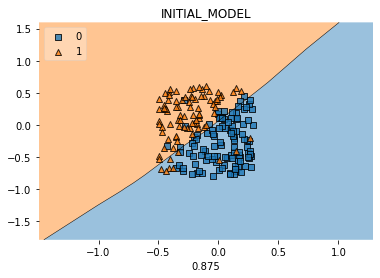

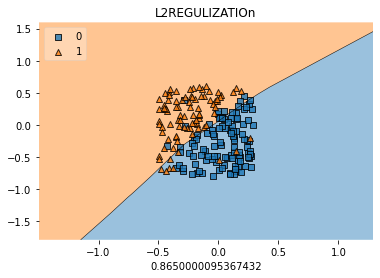

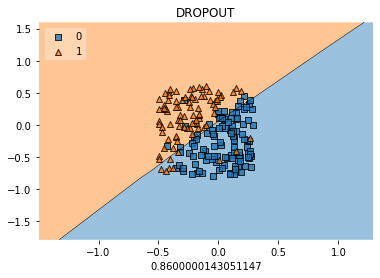

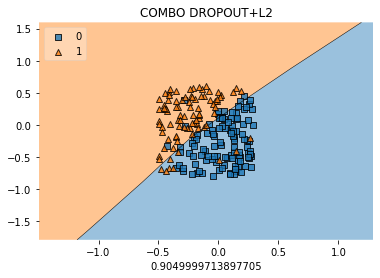

In [407]:
m.plot(a,'INITIAL_MODEL')
m.plot(b,'L2REGULIZATIOn')
m.plot(c,'DROPOUT')
m.plot(d,'COMBO DROPOUT+L2')